In [19]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task_1:

Выберите наборы данных. которые можно интерпретировать, как временные ряды:
* а) зависимость цены на недвижимость в конкретном регионе от времени,
* б) скорость полета самолета при перелете из аэропорта А в аэропорт В,
* в) количество отказов компьютера,
* г) число обращений в поликлинику по району,
* д) координаты автобуса при движении по маршруту,
* е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

##### Решение:

Временные ряды: 
* (а),
* (б) - если это не значение, конечно, а замеры скорости через какие-то промежутки времени, 
* (в) - если как одиночное значение - нет, если коллекция из значений количества отказов за период времени - да, 
* (д), 
* (е)

### Task_2:

Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

##### Решение:

In [3]:
df = pd.read_csv('DUQ_hourly.csv ')

In [7]:
df.head(5)

,Datetime,DUQ_MW
0,2005-12-31 01:00:00,1458.0
1,2005-12-31 02:00:00,1377.0
2,2005-12-31 03:00:00,1351.0
3,2005-12-31 04:00:00,1336.0
4,2005-12-31 05:00:00,1356.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119068 entries, 0 to 119067
Data columns (total 2 columns):
Datetime    119068 non-null object
DUQ_MW      119068 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.8+ MB


In [18]:
df.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


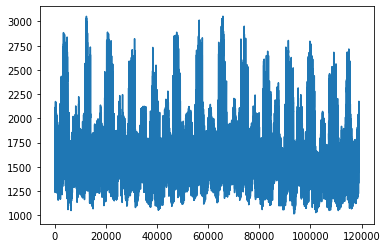

In [16]:
plt.plot(df['DUQ_MW'])

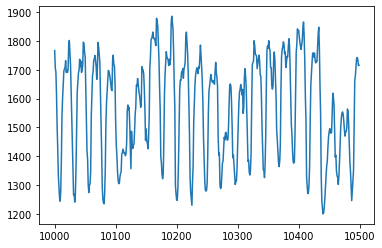

In [15]:
plt.plot(df['DUQ_MW'][10000:10500])

##### Особенности временного ряда:

Особенности данного ряда - ярко выраженная составляющая цикличности, слабо выраженная трендовая составляющая, предположительно, слабо выраженная шумовая составляющая.

In [20]:
os.listdir()

['.ipynb_checkpoints',
 'ci_example.csv',
 'ci_example_revenue.ipynb',
 'covid_19_data.csv',
 'DOM_hourly.csv',
 'DUQ_hourly.csv',
 'Kantorovich.rar',
 'lesson_1_tasks.ipynb',
 'PJME_hourly.csv',
 'tasks.docx',
 '__MACOSX',
 '~$tasks.docx',
 'Анализ COVID 19.ipynb',
 'Временные ряды 1.html',
 'Временные ряды 1.ipynb',
 'Временные ряды 1.pptx',
 'нефть-brent 2010-2019.xlsx']

In [21]:
df = pd.read_excel('нефть-brent 2010-2019.xlsx')

In [23]:
df.head()

,Дата,Значение
0,2019-09-01,58.84
1,2019-08-30,59.19
2,2019-08-29,60.37
3,2019-08-28,59.84
4,2019-08-27,59.59


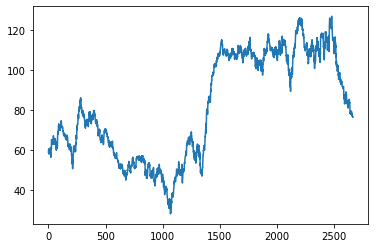

In [25]:
plt.plot(df['Значение'])

### Task_3:

Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [29]:
df.index = df['Дата']

##### Ресемплинг по месяцам:

In [99]:
df_resampled = df.resample('M').apply(lambda values: np.mean(values))
df_resampled.head(5)

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


##### Ресемплинг по неделям:

In [98]:
df_resampled = df.resample('W').mean()
df_resampled.head(5)

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


### Task_4:

Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

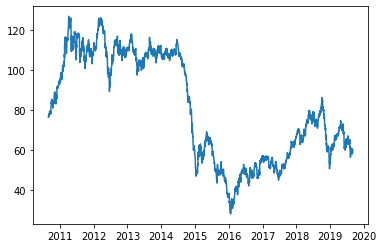

In [101]:
plt.plot(df['Значение'])

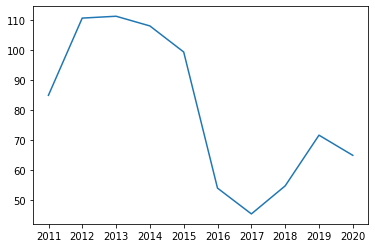

In [104]:
plt.plot(df.resample('Y').mean())

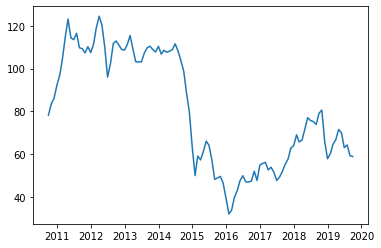

In [105]:
plt.plot(df.resample('M').mean())

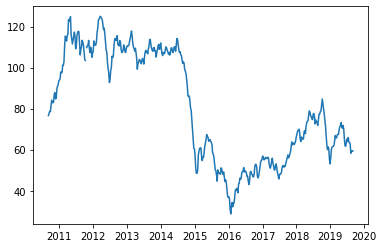

In [106]:
plt.plot(df.resample('W').mean())

### Task_5:

Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

##### Вывод:

Чем старше интервал, тем сглаженней график. В том числе уменьшается шумовая составляющая.